In [1]:
import pandas as pd
%pylab inline
import numpy as np
import pylab as pl
import scipy as sp
from scipy import stats
%pylab inline
pl.style.use("https://raw.githubusercontent.com/fedhere/DSPS/master/fbb.mplstyle")

Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


I extracted precipitations records for Willmington from 2000/01/01 through today. 
The goal is to extract from these data the daily precipitation starting on 2018/01/01 and assess if these data are different from a population with mean $\mu = 0.14$ standard deviation $\sigma= 0.38$. 

Set a p-value at $2\sigma$:  $p=0.05$

In [2]:
rain = pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS/master/labs/1865331.csv")
rain.columns

Index(['STATION', 'NAME', 'DATE', 'PRCP', 'SNOW', 'SNWD', 'WESD', 'WESF'], dtype='object')

In [3]:
rainonly=rain[["DATE","PRCP"]]
rainonly.head()
rainonly.DATE.dtype

dtype('O')

In [4]:
rainonly['DATE']=pd.to_datetime(rainonly.DATE)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [5]:
rainonly.head()

,DATE,PRCP
0,2010-01-01,0.28
1,2010-01-02,0.00
2,2010-01-03,0.00
3,2010-01-04,0.00
4,2010-01-05,0.00


In [0]:
recent = rainonly[rainonly['DATE']>pd.to_datetime("2018/01/01")]

In [7]:
recent.describe()

,PRCP
count,615.000000
mean,0.162504
std,0.365007
min,0.000000
25%,0.000000
50%,0.000000
75%,0.120000
max,2.450000


In [8]:
rainonly.PRCP.describe()

count    3538.000000
mean        0.137340
std         0.382174
min         0.000000
25%         0.000000
50%         0.000000
75%         0.070000
max         6.960000
Name: PRCP, dtype: float64

this is $\frac{\bar X-\mu}{\sigma}\sqrt{N}$:

In [9]:
print("z =",(0.162504-0.137340)/(0.38*(615**(-0.5))))

z = 1.6422287003201257


No, it does not appear that it is significantly higher. For $p<0.05$, the $z$ value would have to be greater than 2 (or less than -2 for statistically significantly less rainfall)

# `HERE BEGINS PART 2`

### `1 What is the test's Null Hypothsis that the K-S test tests?`

*The K-S test's Null Hypothesis is that the two datasets being compared were generated from the same parent distribution.*

---

### `2 What is the "statistic" or "pivotal quantity" that the test uses?`

*It bases it's result off of the greatest distance between the two sampless' Cumulative Distribution Functions*

---

### `3 What does the probability distribution of this statistic depend on?`

*The maximum distance noted above and the sizes of the two samples*

Specifically the null hyponthesis is rejected at a confidence level $\alpha$ if the maximum distance between the two CDFs obeys:

$\displaystyle{D_{m,n}>\sqrt{-\frac{1}{2}\ln\alpha\cdot \frac{n+m}{nm}}}$

In [0]:
quakes_raw=pd.read_csv("https://raw.githubusercontent.com/sheamusfitz/DSPS_jFitzgerald/master/HW3/quakes.csv",sep=" ")

I modified the formatting of this data in a slightly different manner. In vim I ran a search over the data, replacing all instances of "{space}{space}" with "{space}". I repeated this until there were no more instances of "{space}{space}".

In [11]:
quakes_raw.head()

,#YYY/MM/DD,HH:mm:SS.ss,ET,GT,MAG,M,LAT,LON,DEPTH,Q,EVID,NPH,NGRM
0,1984/01/01,01:30:57.52,eq,l,2.02,c,33.246,-116.433,1.6,C,28255.0,13.0,17.0
1,1984/01/01,05:31:34.16,eq,l,2.12,c,32.945,-116.295,5.4,C,28259.0,18.0,42.0
2,1984/01/01,06:59:05.14,eq,l,2.43,c,33.343,-117.628,5.6,C,28260.0,13.0,30.0
3,1984/01/01,11:10:25.29,eq,l,2.07,c,33.668,-116.780,13.8,C,28270.0,19.0,40.0
4,1984/01/01,19:38:19.79,eq,l,2.13,c,33.963,-116.290,2.7,C,28553.0,40.0,49.0


In [12]:
quakes_raw.shape

(71446, 13)

In [13]:
quakes_raw.describe()

,MAG,LAT,LON,DEPTH,EVID,NPH,NGRM
count,71446.000000,71445.000000,71445.000000,71445.000000,7.144500e+04,71445.000000,71445.000000
mean,3.411610,33.960072,-116.843646,5.821510,4.147678e+06,32.018980,203.164574
std,267.281389,1.080535,1.024872,3.976313,3.929716e+06,24.046221,268.520695
min,2.000000,31.820000,-119.854000,0.000000,2.825500e+04,0.000000,0.000000
25%,2.120000,33.097000,-117.662000,3.000000,7.420180e+05,16.000000,63.000000
50%,2.300000,34.045000,-116.580000,5.300000,3.059672e+06,26.000000,122.000000
75%,2.580000,34.568000,-116.247330,7.100000,9.026978e+06,40.000000,242.000000
max,71445.000000,36.628000,-114.237000,29.300000,3.736673e+07,554.000000,3846.000000


whoops, it's taking the number of events as a magnitude, that's no good!

In [0]:
quakes_raw = quakes_raw.drop([71445],axis=0)

In [15]:
quakes_raw.describe()

,MAG,LAT,LON,DEPTH,EVID,NPH,NGRM
count,71445.000000,71445.000000,71445.000000,71445.000000,7.144500e+04,71445.000000,71445.000000
mean,2.411658,33.960072,-116.843646,5.821510,4.147678e+06,32.018980,203.164574
std,0.405114,1.080535,1.024872,3.976313,3.929716e+06,24.046221,268.520695
min,2.000000,31.820000,-119.854000,0.000000,2.825500e+04,0.000000,0.000000
25%,2.120000,33.097000,-117.662000,3.000000,7.420180e+05,16.000000,63.000000
50%,2.300000,34.045000,-116.580000,5.300000,3.059672e+06,26.000000,122.000000
75%,2.580000,34.568000,-116.247330,7.100000,9.026978e+06,40.000000,242.000000
max,7.100000,36.628000,-114.237000,29.300000,3.736673e+07,554.000000,3846.000000


much better

In [16]:
quakes_raw=quakes_raw.rename(index=str,columns={"#YYY/MM/DD": "date", "HH:mm:SS.ss": "time", "MAG": "mag"});
quakes_raw.head()

,date,time,ET,GT,mag,M,LAT,LON,DEPTH,Q,EVID,NPH,NGRM
0,1984/01/01,01:30:57.52,eq,l,2.02,c,33.246,-116.433,1.6,C,28255.0,13.0,17.0
1,1984/01/01,05:31:34.16,eq,l,2.12,c,32.945,-116.295,5.4,C,28259.0,18.0,42.0
2,1984/01/01,06:59:05.14,eq,l,2.43,c,33.343,-117.628,5.6,C,28260.0,13.0,30.0
3,1984/01/01,11:10:25.29,eq,l,2.07,c,33.668,-116.780,13.8,C,28270.0,19.0,40.0
4,1984/01/01,19:38:19.79,eq,l,2.13,c,33.963,-116.290,2.7,C,28553.0,40.0,49.0


In [17]:
eqdata = quakes_raw[["date","time","mag"]]
eqdata.head()

#rainonly=rain[["DATE","PRCP"]]
#rainonly.head()
#rainonly.DATE.dtype

,date,time,mag
0,1984/01/01,01:30:57.52,2.02
1,1984/01/01,05:31:34.16,2.12
2,1984/01/01,06:59:05.14,2.43
3,1984/01/01,11:10:25.29,2.07
4,1984/01/01,19:38:19.79,2.13


In [18]:
eqdata.date.dtype, eqdata.time.dtype

(dtype('O'), dtype('O'))

In [19]:
eqdata.head()

,date,time,mag
0,1984/01/01,01:30:57.52,2.02
1,1984/01/01,05:31:34.16,2.12
2,1984/01/01,06:59:05.14,2.43
3,1984/01/01,11:10:25.29,2.07
4,1984/01/01,19:38:19.79,2.13


In [20]:
print(eqdata['date'][2],
eqdata['time'][2])

1984/01/01 06:59:05.14


In [21]:
timestamps=np.empty(len(eqdata),dtype=pd.datetime)
print(timestamps)

[None None None ... None None None]


There were a few entries with a time of `"HH:MM:60.00"` which the pandas disliked, so again I replaced all instances of `:60.00` with `:59.99`. I'm assuming that *~5* entries of *~70000* being shifted by *0.01 s* will be a negligible change.

In [22]:
for i in range(len(eqdata)):
  #print(i)
  thisdate=f"{eqdata['date'][i]} {eqdata['time'][i]}"
  #print(timestamps[i])
  thisdate=pd.to_datetime(thisdate)
  timestamps[i]=thisdate#pd.to_datetime(thisdate, format="%Y/%m/%d %H:%M:%S.%f")
  #print(timestamps[i],"\n")
print("done")

done


In [23]:
eqdata['timestamps']=timestamps

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
eqdata.head()

,date,time,mag,timestamps
0,1984/01/01,01:30:57.52,2.02,1984-01-01 01:30:57.520
1,1984/01/01,05:31:34.16,2.12,1984-01-01 05:31:34.160
2,1984/01/01,06:59:05.14,2.43,1984-01-01 06:59:05.140
3,1984/01/01,11:10:25.29,2.07,1984-01-01 11:10:25.290
4,1984/01/01,19:38:19.79,2.13,1984-01-01 19:38:19.790


In [25]:
#testing
eqdata['timestamps'][4]-eqdata['timestamps'][3]

Timedelta('0 days 08:27:54.500000')

In [26]:
# create empty container
ss = []

# loop through all year pairs as year and fraction of year
for t in [(1984, 1986.5), 
          (1990.3, 1992.1), 
          (1994.6, 1995.6),
          (1996.1,1996.5), 
          (1997,1997.6), 
          (1997.75,1998.15), 
          (1998.25,1999.35), 
          (2000.55,2000.8),
          (2000.9 ,2001.25), 
          (2001.6 ,2002), 
          (2002.5 ,2003)]:
  
    ss.append((pd.to_datetime(int(t[0]), format="%Y") 
        + pd.Timedelta('%.f days'%((t[0] - int(t[0])) * 365.25)),
               pd.to_datetime(int(t[1]), format="%Y") 
        + pd.Timedelta('%.f days'%((t[1] - int(t[1])) * 365.25))))

gooddates=0
for i in range(11):
  gooddates+=((eqdata.timestamps >= ss[i][0]) & (eqdata.timestamps <= ss[i][1]))

gooddates = (gooddates == True ).astype(bool)
gooddates.head()

0    True
1    True
2    True
3    True
4    True
Name: timestamps, dtype: bool

In [27]:
print(gooddates.sum(), len(gooddates))

17386 71445


In [0]:
eqgood = eqdata.where(gooddates).dropna()

In [29]:
eqgood.head()

,date,time,mag,timestamps
0,1984/01/01,01:30:57.52,2.02,1984-01-01 01:30:57.520
1,1984/01/01,05:31:34.16,2.12,1984-01-01 05:31:34.160
2,1984/01/01,06:59:05.14,2.43,1984-01-01 06:59:05.140
3,1984/01/01,11:10:25.29,2.07,1984-01-01 11:10:25.290
4,1984/01/01,19:38:19.79,2.13,1984-01-01 19:38:19.790


In [30]:
eqgood['timestamps'][13000]

Timestamp('1998-05-01 11:05:50.420000')

Okay cool it does what I want. Also, running `eqgood['timestamps'][70000]` gives an error, which is also what I want.

In [0]:
tilnext=np.diff(pd.Series(eqgood.timestamps).array)

In [32]:
tilnext

array([14436640000000,  5250980000000, 15080150000000, ...,
        1459920000000, 19148060000000, 37530890000000],
      dtype='timedelta64[ns]')

In [0]:
if tilnext[0].astype(int)!=0:
  tilnext=np.insert(tilnext, 0,0)

# i put this block here as a loop because i didnt want to run it again and 
# accidentally get a bunch of 0's inserted into the beginning of the array.

In [34]:
tilnext

array([             0, 14436640000000,  5250980000000, ...,
        1459920000000, 19148060000000, 37530890000000],
      dtype='timedelta64[ns]')

In [0]:
eqgood['tilnext']=tilnext.astype(int)

In [36]:
eqgood.head()

,date,time,mag,timestamps,tilnext
0,1984/01/01,01:30:57.52,2.02,1984-01-01 01:30:57.520,0
1,1984/01/01,05:31:34.16,2.12,1984-01-01 05:31:34.160,14436640000000
2,1984/01/01,06:59:05.14,2.43,1984-01-01 06:59:05.140,5250980000000
3,1984/01/01,11:10:25.29,2.07,1984-01-01 11:10:25.290,15080150000000
4,1984/01/01,19:38:19.79,2.13,1984-01-01 19:38:19.790,30474500000000


In [0]:
eqgood = eqgood.drop(['0'],axis=0)

In [38]:
eqgood.head()

,date,time,mag,timestamps,tilnext
1,1984/01/01,05:31:34.16,2.12,1984-01-01 05:31:34.160,14436640000000
2,1984/01/01,06:59:05.14,2.43,1984-01-01 06:59:05.140,5250980000000
3,1984/01/01,11:10:25.29,2.07,1984-01-01 11:10:25.290,15080150000000
4,1984/01/01,19:38:19.79,2.13,1984-01-01 19:38:19.790,30474500000000
5,1984/01/01,19:39:19.67,2.13,1984-01-01 19:39:19.670,59880000000


In [39]:
eqgood.describe()

,mag,tilnext
count,17385.000000,1.738500e+04
mean,2.385727,3.448969e+13
std,0.384233,1.149716e+15
min,2.000000,1.700000e+08
25%,2.110000,2.921420e+12
50%,2.280000,9.667640e+12
75%,2.540000,2.320878e+13
max,5.800000,1.199903e+17


I'm rescaling the axes in the following two plots to show the time in days rather than nanoseconds, because then the issue is much clearer.

Text(0, 0.5, 'counts')

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


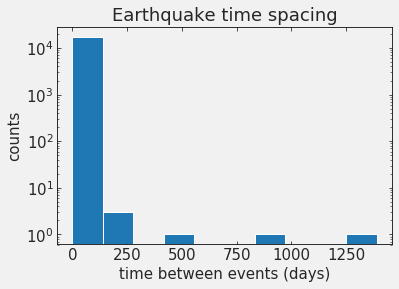

In [40]:
data_scaled = eqgood.tilnext*10**-9/3600/24

pl.hist(data_scaled,log=True)
pl.title('Earthquake time spacing')
pl.xlabel('time between events (days)')
pl.ylabel('counts')

In [41]:
eqgood = eqgood[eqgood.tilnext <= 2.5*10**15]
eqgood.describe()

,mag,tilnext
count,17375.000000,1.737500e+04
mean,2.385844,1.685512e+13
std,0.384292,2.039204e+13
min,2.000000,1.700000e+08
25%,2.110000,2.920040e+12
50%,2.280000,9.657150e+12
75%,2.540000,2.313566e+13
max,5.800000,2.365828e+14


Text(0, 0.5, 'counts')

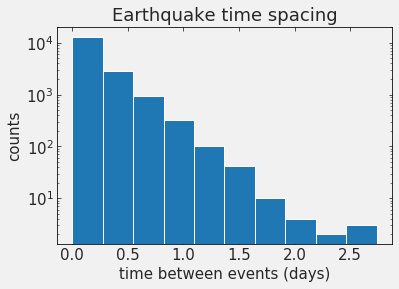

In [42]:
data_scaled = eqgood.tilnext*10**-9/3600/24

pl.hist(data_scaled,log=True)
pl.title('Earthquake time spacing')
pl.xlabel('time between events (days)')
pl.ylabel('counts')

I'm selecting an $\alpha$ threshold of $3\sigma$.

In [43]:
eqgood.tilnext.values

array([14436640000000,  5250980000000, 15080150000000, ...,
        1459920000000, 19148060000000, 37530890000000])

In [44]:
thresholds = [0.01, 0.001]
mag_list = [2.0, 2.5, 3.0, 3.5, 4.0]

tau_normd=np.empty([len(mag_list),len(thresholds)],dtype='O')

#print(tau_normd)

for threshold in thresholds:
  i = thresholds.index(threshold)
  for mk in range(len(mag_list)):
    tau_normd[mk][i]=eqgood.tilnext.where(eqgood.mag>mag_list[mk]).dropna()
    for _ in [1,2]:
      rk = 1/np.mean(tau_normd[mk][i].values)
      #print(rk)
      tau_normd[mk][i] = tau_normd[mk][i].where(tau_normd[mk][i]*rk>threshold).dropna()*rk
    #there were two lines in the pseudocode that were unnecessary, but I'll do them anyways.
    rk = 1/np.mean(tau_normd[mk][i].values)
    tau_normd[mk][i] = tau_normd[mk][i]*rk
  print('---')
  for mk in range(len(mag_list)):
    for ml in range(mk):
      print(mk,ml)
      print(stats.ks_2samp(tau_normd[mk][i].values,tau_normd[ml][i].values))
      
for j in [0,1]:
  for i in range(5):
    print(len(tau_normd[i][j]))

---
1 0
Ks_2sampResult(statistic=0.01646401614679427, pvalue=0.2988924217300161)
2 0
Ks_2sampResult(statistic=0.026143467057560765, pvalue=0.46579212837991557)
2 1
Ks_2sampResult(statistic=0.021496139481659394, pvalue=1.0)
3 0
Ks_2sampResult(statistic=0.07063699966478432, pvalue=0.07869015564429575)
3 1
Ks_2sampResult(statistic=0.060674947049273745, pvalue=0.1976817322234541)
3 2
Ks_2sampResult(statistic=0.05313430764467883, pvalue=0.44653933946712554)
4 0
Ks_2sampResult(statistic=0.12829356999554092, pvalue=0.10857153243367323)
4 1
Ks_2sampResult(statistic=0.12631452677036267, pvalue=0.11297757155874633)
4 2
Ks_2sampResult(statistic=0.12705959423512128, pvalue=0.1269977872439345)
4 3
Ks_2sampResult(statistic=0.09144913269289522, pvalue=0.5631282678202599)
---
1 0
Ks_2sampResult(statistic=0.022693722952343426, pvalue=0.044826450192210744)
2 0
Ks_2sampResult(statistic=0.037953932216514386, pvalue=0.0767506784664994)
2 1
Ks_2sampResult(statistic=0.02617627102781872, pvalue=1.0)
3 0
Ks_2s


$m= 0.01$ | $N$  | $M\geq2.0$ | $M\geq2.5$| $M\geq3.0$ | $M\geq3.5$ | $M\geq4.0$ | 
--- | --- |--- |--- |--- |--- |--- | 
$M\geq2.0$ | $15799$ |-    |29.9%  |46.6% |7.9%   |10.9%
$M\geq2.5$ | $4496$ | 0.016| -     |100%  |19.8%  |11.3%
$M\geq3.0$ | $1132$ | 0.026| 0.021 |-     |50.0%  |15.5%
$M\geq3.5$ | $331$  | 0.070| 0.061 |0.049 | -     |56.3%
$M\geq4.0$ | $89$   | 0.128| 0.126 |0.119 | 0.080 | -

$m= 0.001$ | $N$  | $M\geq2.0$ | $M\geq2.5$| $M\geq3.0$ | $M\geq3.5$ | $M\geq4.0$ | 
--- | --- | --- | --- |---| ---| --- |
$M\geq2.0$ | $16496$|-     |4.5%  |7.7%  |1.8%   |11.0%
$M\geq2.5$ | $4749$ | 0.023|-     |100%  |14.9%  |13.2%
$M\geq3.0$ | $1215$ | 0.038|0.026 |-     |50.0%  |15.5%
$M\geq3.5$ | $335$  | 0.082|0.062 |0.049 | -     |69.4%
$M\geq4.0$ |  $94$  | 0.125|0.112 |0.119 | 0.080 |-



According to this table (specifically for *m=0.001*) it appears that the scaling hypothesis can be rejected. However, the K.S. test may have an issue with datasets this large. See the analysis given in the very last cell of this notebook.

## An explanation of my cumulative probability distribution method
So the cumulative distribution function plots the percentage of all entries with associated times shorter than the given value, for all values in the array.

Equivalently, I could just sort the array, enumerate each entry, and divide the enumeration by the number of entries. That is: the lowest entry has 0 shorter measurements in the set, the second lowest has 1, the third lowest has 2... So this is simply the index of the sorted measuement. These need to be normalized to a percent of the total sample rather than an integer number due to varied sub-sample sizes.

The cumulative distribution function is then the index of the value (normalized to a maximum of 1) as a function of the value (normalized to a mean of 1).

In [45]:
tau_sort = np.zeros_like(tau_normd)

for i in range(len(tau_normd)):
  for j in range(len(tau_normd[i])):
    tau_sort[i,j] = np.sort(tau_normd[i,j].values)

tau_sort[1]

array([array([1.01179314e-02, 1.02565171e-02, 1.02747986e-02, ...,
       1.00244457e+01, 1.03540890e+01, 1.39519032e+01]),
       array([1.01323487e-03, 1.04063643e-03, 1.05495997e-03, ...,
       1.05860163e+01, 1.09341264e+01, 1.47334906e+01])], dtype=object)

Text(0.5, 1.0, 'Scaled Inter-Event Earthquake Times\nthreshold=0.01')

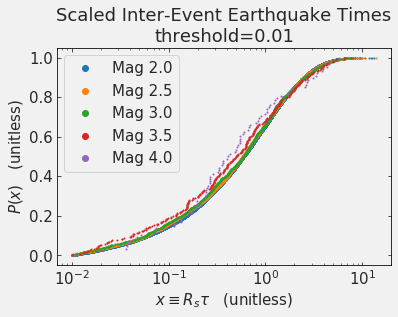

In [46]:
for i in range(len(tau_sort)):
  pl.plot(tau_sort[i][0],np.linspace(0,1,num=len(tau_sort[i][0])),'.',
          markersize=2, label='Mag '+str(mag_list[i]))
pl.legend(markerscale=6)
pl.ylabel(r'$P(x)\quad$(unitless)')
pl.xlabel(r'$x\equiv R_s\tau\quad$(unitless)')
pl.xscale('log')
pl.title('Scaled Inter-Event Earthquake Times\nthreshold=0.01')


Text(0.5, 1.0, 'Scaled Inter-Event Earthquake Times\nthreshold=0.001')

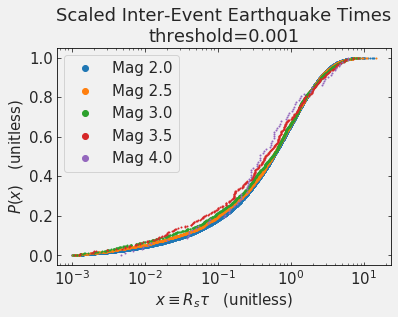

In [47]:
for i in range(len(tau_sort)):
  pl.plot(tau_sort[i][1],np.linspace(0,1,num=len(tau_sort[i][1])),'.',
          markersize=2,label='Mag '+str(mag_list[i]))
pl.legend(markerscale=6)
pl.ylabel(r'$P(x)\quad$(unitless)')
pl.xlabel(r'$x\equiv R_s\tau\quad$(unitless)')
pl.xscale('log')
pl.title('Scaled Inter-Event Earthquake Times\nthreshold=0.001')


In [48]:
print(stats.ks_2samp(tau_normd[0][0].values,tau_normd[4][0].values).pvalue)

0.10857153243367323


Okay since the above code works then this should be easy

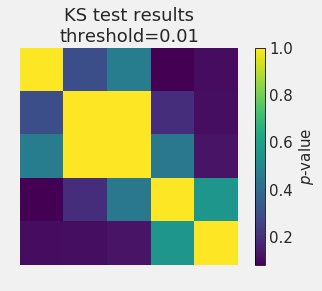

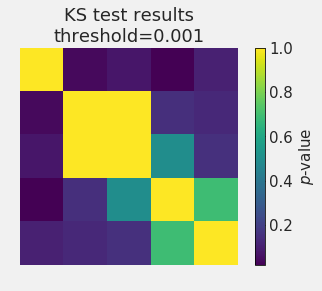

In [49]:
ks_pvals = np.ones([2,5,5])
#ks_pvals


for i1 in range(5):
  for i2 in range(i1):
    for thr in range(2):
      ks_pvals[thr,i1,i2] = stats.ks_2samp(tau_normd[i1,thr].values,tau_normd[i2,thr].values).pvalue
      ks_pvals[thr,i2,i1] = ks_pvals[thr,i1,i2]

pl.imshow(ks_pvals[0]);
pl.axis('off')
cb = pl.colorbar()
cb.ax.set_ylabel(r'$p$-value')
pl.title("KS test results\nthreshold=0.01");

pl.show()

pl.imshow(ks_pvals[1]);
pl.axis('off')
cb = pl.colorbar()
cb.ax.set_ylabel(r'$p$-value')
pl.title("KS test results\nthreshold=0.001");

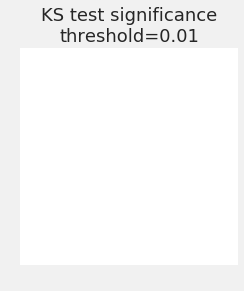

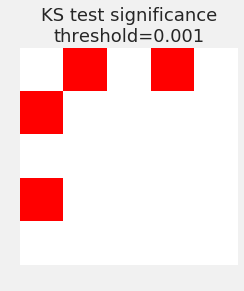

In [50]:
#import matplotlib.colors as colors

pl.imshow(ks_pvals[0],vmin=0.05, vmax=0.05);
pl.axis('off')
cb = pl.colorbar()
cb.cmap.set_under('r')
cb.cmap.set_over('w')
cb.remove()
pl.title("KS test significance\nthreshold=0.01");

pl.show()

pl.imshow(ks_pvals[1],vmin=0.05, vmax=0.05);
pl.axis('off')
cb = pl.colorbar()
cb.cmap.set_under('r')
cb.cmap.set_over('w')
cb.remove()
pl.title("KS test significance\nthreshold=0.001");

I did not need to change my significance threshold $\alpha$ in order to see some significance. This is most likely because the KS test is ill-suited for such large datasets. I've found some literature on issues with the KS test in general as well.

Note that both the tests that gave significant results were found when comparing the largest dataset to another. With so many points to compare, there may be an increase in the probability of finding statistically significant results that the test does not account for.